In [1]:
empirical = replicate(6000, sum(rexp(n = 3)))

mean(empirical)

sd(empirical)

sum(empirical <= 5)/length(empirical)

[1] 3.005774

[1] 1.724555

[1] 0.876

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

[[5]]
NULL

[[6]]
NULL

[[7]]
NULL

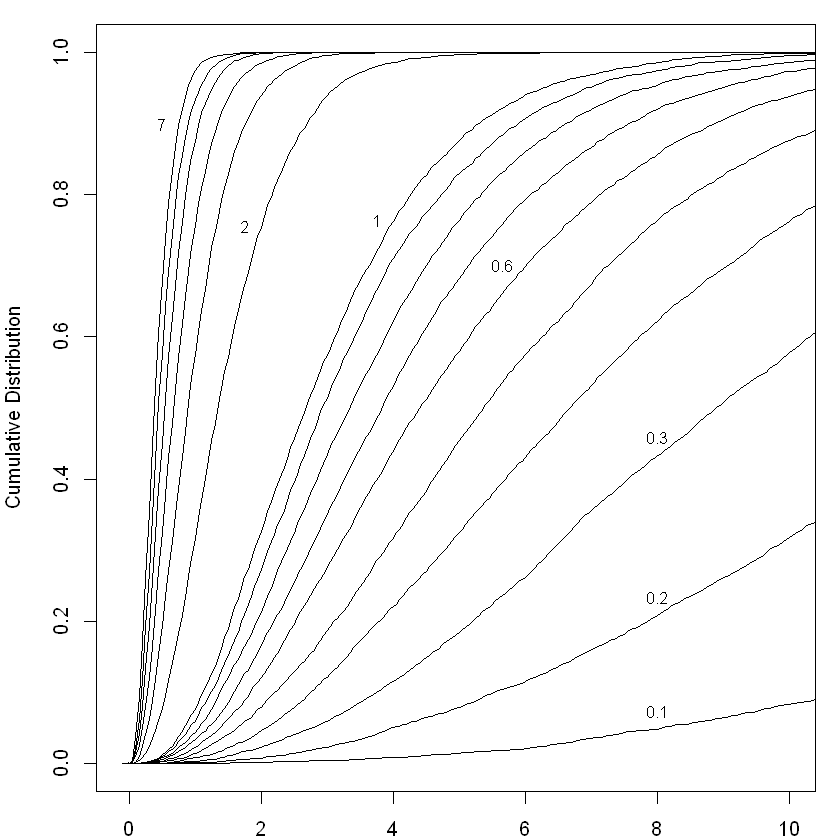

In [2]:
rates = c(seq(0.1, 1, by = 0.1), seq(2, 7, by = 1))

samples = lapply(rates, function(r) {
             replicate(6000, sum(rexp(n = 3, rate = r))) })

# pdf("BA_MCexample.pdf", width = 8, height = 5)
par(mar = c(2,4,1,1))
plot(0, 0, xlim = c(-0.1, 10), ylim = c(0, 1), pch = ".",
     xlab="", ylab="Cumulative Distribution")
xx = seq(-0.1, 20, by = 0.05)

invisible(lapply(samples[-(19:20)], function(s) {
  Fn = ecdf(s)
  ptile = Fn(xx)
  points(x = xx, y = ptile, type = "l")
}))

labs = c(1, 2, 3, 6, 10, 11, 16)
xs = c(8,8,8,6, 4, 2, 0.75)
poss = c(3,3,3, 2, 2, 2,2)
mapply(function(lab, s, x, r, p) 
  {
  Fn = ecdf(s)
  text(x = x, y = Fn(x), labels = r, pos = p, cex = 0.8)
}, lab = labs, s = samples[labs], x = xs, r = rates[labs], p = poss)

# dev.off()

In [3]:
seedx = 116201412
set.seed(seedx)

kappa = 0.3
d0 = rexp(1, rate = kappa)
d0

[1] 8.38445

In [ ]:
lambda = 0.5
birth1 = rexp(1, rate = lambda)
birth1

itime = c(birth1, rexp(1, rate = lambda))
itime

itime = c(itime, rexp(1, rate = lambda))
itime

cumsum(itime)

itime = c(itime, rexp(1, rate = lambda))
btime = cumsum(itime)
btime

btime = btime[ btime < d0 ]

dtime = d0 + rexp(n = length(btime), rate = kappa) 
dtime

btime[1] + rexp(1, rate = lambda)

dtime[1] + rexp(1, rate = kappa)

genKids = 
function(bTime, cTime, lambda = 0.5, kappa = 0.3) 
{
         # Parent job born at bTime and completes at cTime
    
         # Birth time of first child
    mostRecent = rexp(1, rate = lambda) + bTime
    kidBirths = numeric()

    while (mostRecent < cTime) {
      kidBirths = c(kidBirths, mostRecent)
      mostRecent = mostRecent  + rexp(1, rate = lambda) 
    }
    
         # generate lifetimes for all offspring
    numKids = length(kidBirths)
    runtime = rexp(numKids, rate = kappa)
    kidCompletes = rep(cTime, numKids) + runtime
    
    data.frame(births = kidBirths, 
               completes = kidCompletes)
}

set.seed(seedx)

genKids(1, 6)

genKids(1, 6)

genKids(1, 6)

genBirth = function(currentTime, cTime, 
                    births = numeric(), lambda = 0.5) {
          
         # Generate birth time of next job after currentTime
    mostRecent = rexp(1, rate = lambda) + currentTime
    
    if (mostRecent > cTime) 
      return(births)
    else {
      births = c(births, mostRecent)
      genBirth(currentTime = mostRecent, cTime, births, lambda)
    }
  }

genKidsR = 
function(bTime, cTime, lambda = 0.5, kappa = 0.3) {
         # Parent job born at bTime and completes at cTime
    
    kidBirths = genBirth(bTime, cTime, lambda = lambda)
    
         # generate lifetimes for all offspring
    numKids = length(kidBirths)
    runtime = rexp(numKids, rate = kappa)
    kidDeaths = rep(cTime, numKids) + runtime
    
    data.frame(births = kidBirths, 
               completes = kidDeaths)
} 

set.seed(seedx)

numKids = replicate(1000, nrow(genKids(1, 6)))
mean(numKids)

eprobs = table(numKids)/length(numKids)
probs = dpois(x = 0:max(numKids), lambda = 2.5)

plot(eprobs, type = "h",
     ylab = "Proportion", xlab = "Number of offspring")
segments(x0 = 0.1 + 0:max(numKids), y0 = rep(0, max(numKids)), 
         y1 = probs, col="grey", lwd = 2)

pdf("numSimOffspring.pdf", width = 8, height = 5)
oldPar = par(mar = c(4.1, 4.1, 1, 1))

plot(eprobs, type = "h",
     ylab = "Proportion", xlab = "Number of offspring")
segments(x0 = 0.1 + 0:max(numKids), 
         y0 = rep(0, max(numKids)), y1 = probs,
         col="grey", lwd = 2)

par(oldPar)
dev.off()

obsCt = table(numKids)
expCt = 1000* c(dpois(0:8, lambda = 2.5), 
                ppois(8, lower.tail = FALSE, lambda = 2.5))
stat = sum((obsCt - expCt)^2/expCt)
pchisq(stat, df = 9, lower.tail = FALSE)

genKidsU = 
  function(bTime, cTime, lambda = 0.5, kappa = 0.3) {
         # Generate the birth times and assassination times
         # for the children of a job who is born at bTime 
         # and completed at cTime.
    lambda = (cTime - bTime) * lambda
    numKids = rpois(1, lambda = lambda)
    kidBirths = sort(runif(numKids, min = bTime, max = cTime))
    
         # generate lifetimes for each offspring
    runtime = rexp(numKids, rate = kappa)
    kidDeaths = rep(cTime, numKids) + runtime
    
    return(data.frame(births = kidBirths, completes = kidDeaths))
  }

seedx = 116201412
set.seed(seedx)

time1 = system.time( replicate(4000, genKids(1, cTime = 9)) )
time2 = system.time( replicate(4000, genKidsU(1, cTime = 9)) )

time1/time2

time1 = system.time( replicate(4000, genKids(1, cTime = 100)) )
time2 = system.time( replicate(4000, genKidsU(1, cTime = 100)) )
time1/time2

set.seed(seedx)
Rprof("profGenKids1.out")
invisible( replicate(1000, genKids(1, cTime = 100)) )
Rprof(NULL)

summaryRprof("profGenKids1.out")$by.self

set.seed(seedx)
Rprof("profGenKidsU.out")
invisible( replicate(1000, genKidsU(1, cTime = 100)) )
Rprof(NULL)
summaryRprof("profGenKidsU.out")$by.self

genKidsV = function(bTimes, cTimes, lambda = 0.5, kappa = 0.3) {
       # bTimes & cTimes - vector of birth and completion times

       # Determine how many children each job has
  parentAge = cTimes - bTimes
  numKids = rpois(n = length(parentAge), 
                  lambda = lambda*parentAge)
  
       # Determine the birth and completion times of the children
  mapply(function(n, min, max) {
            births = sort(runif(n, min, max))
            runtimes = rexp(n, rate = kappa)
            completes = rep(max, n) + runtimes
            data.frame(births, completes)
         },
         n = numKids , min = bTimes, max = cTimes,
         SIMPLIFY = FALSE)
}

bTimes1 = 1:3
cTimes1 = c(3, 10, 15)

seed1 = 12062013
set.seed(seed1)

kids = genKidsV(bTimes1, cTimes1)
kids


kids2 = genKidsV(bTimes1, cTimes1)
sapply(kids2, nrow)

set.seed(seed1)
kids3 = genKidsV(bTimes = bTimes1, cTimes = cTimes1)
identical(kids, kids3)

genKidsV = function(bTimes, cTimes, parentID, lambda = 0.5, kappa = 0.3) {
       # Determine how many children each job has
  parentAge = cTimes - bTimes
  numKids = rpois(n = length(parentAge), lambda = lambda * parentAge)
  
  if (sum(numKids) == 0) return(NULL)
  
       # Determine the birth times of the children  
  kidStats = 
    mapply(function(n, min, max) {
      births = sort(runif(n, min, max))
      runtimes = rexp(n, rate = kappa)
      completes = rep(max, n) + runtimes
      data.frame(births, completes)
    },
           n = numKids , min = bTimes, max = cTimes, 
           SIMPLIFY = FALSE)
  
 
  return(data.frame(parentID = rep(parentID, numKids),
                    kidID = 1:sum(numKids), 
                    births = unlist(lapply(kidStats, "[[", "births")), 
                    completes = unlist(lapply(kidStats,"[[", "completes"))
                    ))
}

set.seed(seed1)
genKidsV(bTimes1, cTimes1, parentID = letters[1:3])

familyTree = function(lambda = 0.5, kappa = 0.3, maxGen = 10) {
       # maxGen - maximum number of generations to observe
       # Return value - a list with 1 data frame per generation.
  allGens = vector(mode = "list", length = maxGen)
  
       # Generate the root of the tree
  allGens[[1]] = data.frame(parentID = NA, kidID = 1, births = 0,
                            completes = rexp(1, rate = kappa))
  
       # Generate future generations, one at a time.
  for (i in 2:maxGen) {
    nextGen = genKidsV(bTimes = allGens[[ (i - 1) ]]$births,
                       cTimes = allGens[[ (i - 1) ]]$completes,
                       parentID = allGens[[ (i - 1) ]]$kidID,
                       lambda = lambda, kappa = kappa)
    if (is.null(nextGen)) return(allGens[ 1:(i - 1) ])
    allGens[[ i ]] = nextGen
  }
  
  return(allGens)
}

set.seed(seed1)
tree = familyTree(lambda = 0.4, kappa = 1, maxGen = 10)

pdf("BA_FamilyTree.pdf", width = 8, height = 5)
oldPar = par(mar = c(4.1, 4.1, 0.5, 0.5))

set.seed(seed1)
g = familyTree(lambda = 0.4, kappa = 1, maxGen = 10)

maxLife = max(sapply(g, function(gen) max(gen$completes)))
numFamily = sum(sapply(g, nrow))

plot(0,0, ylim = c(0.5, numFamily + 0.5), xlim = c(0, maxLife),
     xlab = "Time", ylab = "", type ="n",
     axes = FALSE)

box()
axis(1)
numGen = length(g)
numKids = sapply(g, nrow)
treeN = g[ 2:(numGen + 1) ]
birthNum = c(0, cumsum(sapply(g, nrow))[ -length(g)])
axis(2, at = birthNum + 1, 
     labels = paste("Gen", 1:numGen), tick = FALSE, las = 1)

mapply(function(gen, nextGen, birthNum) {
  birthOrder = birthNum + (1:nrow(gen))
  segments(x0 = gen$births, x1 = gen$completes, y0 = birthOrder,
          lwd = 3, col = "grey")
  abline(h = 0.5 + max(birthOrder), lty = 2, col="black" )
  if (all(!is.na(nextGen$births)))
  points(x = nextGen$births, y = birthOrder[nextGen$parentID],
         pch = 4)
  },
  gen = g, nextGen = treeN, birthNum = birthNum )
par(oldPar)
dev.off()

seed2 = 12212013
set.seed(seed2)
tree = familyTree(lambda = 0.3, kappa = 0.5, maxGen = 10)

length(tree)

sapply(tree, nrow)

sum(sapply(tree, nrow))

set.seed(seed2)
tree = familyTree(lambda = 0.3, kappa = 0.5, maxGen = 15)
sapply(tree[ - (1:9) ], nrow)

set.seed(seed2)
tree = familyTree(lambda = 1, kappa = 0.5, maxGen = 10)

length(tree)

sapply(tree, nrow)

sum(sapply(tree, nrow))

tree = familyTree(lambda = 1, kappa = 0.5, maxGen = 10)
sum(sapply(tree, nrow))

sapply(tree, function(gen) range(gen$births))

sapply(tree, function(gen) range(gen$completes))

familyTreeT = function(lambda = 0.5, kappa = 0.3, maxTime = 8) {
       # maxTime - maximum length of time to observe the process
  allGens = list()
  
       # Generate the root of the 
  allGens[[1]] = data.frame(parentID = NA, kidID = 1, 
                            births = 0, 
                            completes = rexp(1, rate = kappa))
  
       # Generate the future generations, one at a time.
  numGens = 1
  while (TRUE) {
    nextGen = genKidsV(bTimes = allGens[[ numGens ]]$births,
                       cTimes = allGens[[ numGens ]]$completes,
                       parentID = allGens[[ numGens ]]$kidID,
                       lambda = lambda, kappa = kappa)
    
    if ( is.null(nextGen) | (min(nextGen$births) > maxTime) ) {
           # If complete after maxTime set complete to NA
      allGens = lapply(allGens, function(gen) {
        gen$completes[ gen$completes > maxTime ] = NA
        gen
      })
      return(allGens)
    }
    
    # Drop those born after maxTime 
    nextGen = nextGen[ nextGen$births <= maxTime , ]
    nextGen$kidID = 1:nrow(nextGen)
    numGens = numGens + 1
    allGens[[ numGens ]] = nextGen    
  }  
}	

familyTree = function(lambda = 0.5, kappa = 0.3, 
                      maxGen = 10, maxOffspring = 1000) {

       # Return value - a list with 1 data frame per generation.
  allGens = vector(mode = "list", length = maxGen)
  
       # Generate root of the tree
  allGens[[1]] = data.frame(parentID = NA, kidID = 1, 
                            births = 0, 
                            completes = rexp(1, rate = kappa))
  
  currentNumOffspring = 0

       # Generate future generations, one at a time.
  for (i in 2:maxGen) {
    nextGen = genKidsV(bTimes = allGens[[ (i - 1) ]]$births,
                       cTimes = allGens[[ (i - 1) ]]$completes,
                       parentID = allGens[[ (i - 1) ]]$kidID,
                       lambda = lambda, kappa = kappa)
    if (is.null(nextGen)) return(allGens[ 1:(i - 1) ]) 
    allGens[[ i ]] = nextGen
    currentNumOffspring = currentNumOffspring + nrow(nextGen)
    if (currentNumOffspring > maxOffspring) 
      return(allGens[1:i])
  }  
  allGens
}

set.seed(seed2)
tree = familyTree(lambda = 1, kappa = 0.5, 
                  maxGen = 100, maxOffspring = 1000)

length(tree)

sapply(tree, nrow)

sum(sapply(tree, nrow))

set.seed(seed2)
treeVT = familyTreeT(lambda = 1, kappa = 0.5)

numGen = 5
treeSub = treeVT[1:numGen]
numKids = sapply(treeSub, nrow)
numFamily = sum(numKids)

treeSub = lapply(treeSub, 
                 function(gen) {
                   gen$completes[ is.na(gen$completes) ] = 8
                   gen
                   })

treeSubN = treeVT[ 2:(numGen + 1) ]
treeSubN = lapply(treeSubN, 
                  function(gen) {
                    gen$completes[ is.na(gen$completes) ] = 8
                    gen
                 })
  
maxLife = max(sapply(treeSub, function(gen) max(gen$completes)))

birthNum = c(0, cumsum(numKids)[ -numGen ])

pdf("BA_FamilyTreeVT.pdf", width = 8, height = 15)
oldPar = par(mar = c(4.1, 4.1, 0.5, 0.5))

plot(0,0, ylim = c(0.5, numFamily), xlim = c(0, maxLife),
     xlab = "Time", ylab = "", type ="n",
     axes = FALSE)

box()
axis(1)
axis(2, at = birthNum + c(0.5, rep(1, (numGen-1))), 
     labels = paste("Gen", 1:numGen), tick = FALSE, las = 1)

mapply(function(gen, nextGen, birthNum) {
  birthOrder = birthNum + (1:nrow(gen))
  segments(x0 = gen$births, x1 = gen$completes, y0 = birthOrder,
           lwd = 3, col = "grey")
  abline(h = 0.5 + max(birthOrder), lty = 2, col="black" )
  points(x = nextGen$births, y = birthOrder[nextGen$parentID],
           pch = 4)
}, gen = treeSub, nextGen = treeSubN, birthNum = birthNum )

abline(v = maxLife)

par(oldPar)
dev.off()

exptOne = function(l, k, mG, mO){
       # Helper function to call familyTree
       # Returns - summary statistics for analysis,
  
  aTree = familyTree(lambda = l, kappa = k, maxGen = mG,
                      maxOffspring = mO)
  numGen = length(aTree)
  numJobs = sum(sapply(aTree, nrow))
  c(numGen, numJobs)
}

set.seed(seed2)
exptOne(1, 0.5, 100, 1000)

familyTreeT = function(lambda = 0.5, kappa = 0.3, maxTime = 8) {
  # maxTime - maximum length of time to observe the family
  allGens = list()
  
  # Generate the root of the 
  allGens[[1]] = data.frame(parentID = NA, kidID = 1, 
                            births = 0, 
                            completes = rexp(1, rate = kappa))
  
  # Generate the future generations, one at a time.
  numGens = 1
  while (TRUE) {
    nextGen = genKidsV(bTimes = allGens[[ numGens ]]$births,
                       cTimes = allGens[[ numGens ]]$completes,
                       parentID = allGens[[ numGens ]]$kidID,
                       lambda = lambda, kappa = kappa)
    
    treeTerminated = is.null(nextGen)
    if ( !treeTerminated ) {
      birthsPastObsTime = min(nextGen$births) > maxTime
    }
    else birthsPastObsTime = TRUE
    
    if ( treeTerminated | birthsPastObsTime ) {
      # If complete after maxTime set complete to NA
      allGens = lapply(allGens, function(gen) {
        gen$completes[ gen$completes > maxTime ] = NA
        gen
      })
      return(allGens)
    }
    
    # Drop those born after maxTime 
    nextGen = nextGen[ nextGen$births <= maxTime , ]
    nextGen$kidID = 1:nrow(nextGen)
    numGens = numGens + 1
    allGens[[ numGens ]] = nextGen    
  }  
}

MCBA = function(params, repeats = 5, mG = 10, mO = 1000){
       # params: matrix columns of lambda and kappa values
       # For each lambda and kappa pair, run "repeats" times
  
  n = nrow(params)
  mcResults = vector("list", length = n)
  
  for (i in 1:n) {
    cat("param set is ", i, "\n")
    mcResults[[i]] = replicate(repeats,
                               exptOne(l = params[i, 1],
                                       k = params[i, 2],
                                       mG = mG, mO = mO))
  }
  mcResults
}

trialKappas = c(0.1, 10, 0.1, 10)
trialLambdas = c(0.1, 0.1, 10, 10)
trialParams = matrix(c(trialLambdas, trialKappas), ncol = 2)
mcTrialOutput = MCBA(params = trialParams, repeats = 100, 
                     mG = 200, mO = 100000)

save(mcTrialOutput, file = "mcTrialOutput.rda")

pdf("BA_ScatterPlotNumGenByNumKids.pdf", width = 10, height = 8)

oldPar = par(mfrow = c(2, 2), mar = c(3,3,1,1))

mapply(function(oneSet, lambda, kappa) {
  plot(x = oneSet[2,], y = jitter(oneSet[1, ], 1), log = "x",
       ylim = c(1,20), xlim = c(1, 10^7), pch = 19, cex = 0.6)
  text(x = 50, y = 15, bquote(paste(lambda == .(lambda))) )
  text(x = 300, y = 15, bquote(paste(kappa == .(kappa))) )
  }, 
  mcTrialOutput, lambda = trialLambdas, kappa = trialKappas)

par(oldPar)

dev.off()

lambdas = c(seq(0.1, 0.6, by = 0.1), seq(0.8, 2, by = 0.2), 
            seq(2.25, 3, by = 0.25))
kappas = c(lambdas, 3.25, 3.50, 3.75, 4.00, 4.50, 5.00)

paramGrid = as.matrix(expand.grid(lambdas, kappas))

pdf("BA_Scatterplot3Dkids.pdf", width = 7, height = 6)

mcGrid = MCBA(params = paramGrid, repeats = 400, mG = 20,
                mO = 1000)

save(mcGrid, file = "mcGridOutput.rda")

logUQkids = sapply(mcGrid, function(x) 
               log(quantile(x[2, ], probs = 0.75), base = 10))

UQCut = cut(logUQkids, breaks = c(-0.1, 0.5, 2, max(logUQkids)) )
color3 = c("#b3cde3aa", "#8856a7aa", "#810f7caa")
colors = color3[UQCut]

library(scatterplot3d)
sdp = scatterplot3d(x = paramGrid[ , 1], y = paramGrid[ , 2], 
                    z = logUQkids, pch = 15, color = colors,
                    xlab = "Lambda", ylab = "Kappa",
                    zlab = "Upper Quartile Offspring",
                    angle = 120, type="h")

legend("left", inset = .08, bty = "n", cex = 0.8,
       legend = c("[0, 0.5)", "[0.5, 2)", "[2, 5)"), 
       fill = color3)

dev.off()

pdf("BA_ImageMapAlive.pdf", width = 7, height = 7)
oldPar  = par(mar = c(4.1, 4.1, 0.5, 0.5))

mcGridAlive = sapply(mcGrid, function(oneParamSet) {
  sum((oneParamSet[1,] == 20) | (oneParamSet[2,] > 1000)) / 
    length(oneParamSet[2,]) })

filled.contour(lambdas, kappas, 
               matrix(mcGridAlive, nrow = length(lambdas), 
                      ncol = length(kappas)), 
               xlab = "Lambda", ylab = "Kappa", 
               xlim = c(0.1, 3), ylim = c(0.1, 3.1)) 

par(oldPar)
dev.off()

pdf("BA_ImageMapAtleast20Kids.pdf", width = 7, height = 7)
oldPar  = par(mar = c(4.1, 4.1, 2, 1))

mcGridProp20kids = sapply(mcGrid, function(oneParamSet) {
  sum(oneParamSet[2,] > 19) / length(oneParamSet[2,]) })

mcGridProp20kidsMat = matrix(mcGridProp20kids, 
                             nrow = length(lambdas), 
                             ncol = length(kappas))

breaks = c(0, 0.10, 0.2, 0.3, 0.5, 0.7, 0.9, 1)
colors = rev(rainbow(10))[-(1:3)]

image(lambdas, kappas, mcGridProp20kidsMat, col = colors,
      breaks = breaks, xlab = "Lambda", ylab = "Kappa", 
      xlim = c(0.05, 3.05), ylim = c(0.05, 3.05))

midBreaks = (breaks[ -8 ] + breaks[ -1 ]) / 2
legend(x = 0.1, y = 3.25, legend = midBreaks, fill = cols, 
       bty = "n", ncol = 7,  xpd = TRUE)

par(oldPar)
dev.off()